<a href="https://colab.research.google.com/github/TheSkyAboveTheSky/Projet-PFA/blob/main/PFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

# **Remove all the files in a directory**

In [ ]:
def removeImages(data_dir) :
  file_list = os.listdir(data_dir)
  for file_name in file_list:
      file_path = os.path.join(data_dir, file_name)
      if os.path.isfile(file_path):
          os.remove(file_path)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet

# **Read the XML Files and get the fields and the coordonées from them**

In [ ]:
xml_file = xet.parse('data/A (1).xml')
root = xml_file.getroot()
for obj in root.findall('object'):
    name = obj.find('name').text
    xmin = int(obj.find('bndbox/xmin').text)
    ymin = int(obj.find('bndbox/ymin').text)
    xmax = int(obj.find('bndbox/xmax').text)
    ymax = int(obj.find('bndbox/ymax').text)
    print([name,xmin,xmax,ymin,ymax])

['prenom', 67, 323, 608, 755]
['nom', 83, 378, 799, 908]
['date', 978, 1452, 984, 1081]
['apogee', 1023, 1423, 1106, 1206]
['cne', 1007, 1500, 1239, 1341]
['email', 154, 1109, 1721, 1817]


In [ ]:
path = 'data/'
# List all our XML files in our data directory
files = [filename for filename in os.listdir(path) if filename.endswith('.xml')]
print(len(files),files)

115 ['A (110).xml', 'A (14).xml', 'A (69).xml', 'A (11).xml', 'A (42).xml', 'A (51).xml', 'A (47).xml', 'A (106).xml', 'A (45).xml', 'A (62).xml', 'A (72).xml', 'A (91).xml', 'A (25).xml', 'A (84).xml', 'A (18).xml', 'A (5).xml', 'A (77).xml', 'A (107).xml', 'A (115).xml', 'A (2).xml', 'A (66).xml', 'A (56).xml', 'A (59).xml', 'A (85).xml', 'A (40).xml', 'A (95).xml', 'A (109).xml', 'A (43).xml', 'A (80).xml', 'A (24).xml', 'A (1).xml', 'A (4).xml', 'A (10).xml', 'A (8).xml', 'A (70).xml', 'A (28).xml', 'A (113).xml', 'A (61).xml', 'A (98).xml', 'A (55).xml', 'A (49).xml', 'A (52).xml', 'A (108).xml', 'A (71).xml', 'A (96).xml', 'A (34).xml', 'A (39).xml', 'A (97).xml', 'A (111).xml', 'A (114).xml', 'A (100).xml', 'A (94).xml', 'A (7).xml', 'A (65).xml', 'A (30).xml', 'A (78).xml', 'A (21).xml', 'A (48).xml', 'A (67).xml', 'A (36).xml', 'A (32).xml', 'A (57).xml', 'A (63).xml', 'A (6).xml', 'A (58).xml', 'A (112).xml', 'A (17).xml', 'A (87).xml', 'A (15).xml', 'A (20).xml', 'A (44).xml

In [ ]:
labels_dict = {
      'filepath': [], 
      'prenom_xmin': [], 'prenom_xmax': [], 'prenom_ymin': [], 'prenom_ymax': [],
      'nom_xmin': [], 'nom_xmax': [], 'nom_ymin': [], 'nom_ymax': [],
      'date_xmin': [], 'date_xmax': [], 'date_ymin': [], 'date_ymax': [],
      'apogee_xmin': [], 'apogee_xmax': [], 'apogee_ymin': [], 'apogee_ymax': [],
      'cne_xmin': [], 'cne_xmax': [], 'cne_ymin': [], 'cne_ymax': [],
      'email_xmin': [], 'email_xmax': [], 'email_ymin': [], 'email_ymax': []  
}

In [ ]:
# Loop ela ga3 fichiers XML that we have
for filename in files :
  file_path = os.path.join(path,filename)
  # Parse the XMl File
  xml_file = xet.parse(file_path)
  root = xml_file.getroot()
  for objet in root.findall('object'):
    # get our objects , li huma fields dyalna (prenom , nom ....)
    objet_name = objet.find('name') # Our field
    # ila makanch
    if objet_name is None :
      # SKip
      continue
    # Smiya d field
    objet_name_text = objet_name.text
    # Bounding boxes
    labels = objet.find('bndbox')
    if labels is None :
      continue
    xmin_element = labels.find('xmin')
    xmax_element = labels.find('xmax')
    ymin_element = labels.find('ymin')
    ymax_element = labels.find('ymax')
    if None in (xmin_element, xmax_element, ymin_element, ymax_element):
      continue
    xmin = int(xmin_element.text)
    xmax = int(xmax_element.text)
    ymin = int(ymin_element.text)
    ymax = int(ymax_element.text)
    if file_path not in labels_dict['filepath']:
            labels_dict['filepath'].append(file_path)
    labels_dict[f'{objet_name_text}_xmin'].append(xmin)
    labels_dict[f'{objet_name_text}_xmax'].append(xmax)
    labels_dict[f'{objet_name_text}_ymin'].append(ymin)
    labels_dict[f'{objet_name_text}_ymax'].append(ymax)


In [ ]:
len(labels_dict['filepath'])

115

In [ ]:
df = pd.DataFrame(labels_dict)
df.to_csv('labels.csv', index=False)
df.head()

,filepath,prenom_xmin,prenom_xmax,prenom_ymin,prenom_ymax,nom_xmin,nom_xmax,nom_ymin,nom_ymax,date_xmin,...,apogee_ymin,apogee_ymax,cne_xmin,cne_xmax,cne_ymin,cne_ymax,email_xmin,email_xmax,email_ymin,email_ymax
0,data/A (110).xml,60,383,624,746,74,374,786,906,992,...,1099,1208,985,1523,1233,1355,143,1154,1728,1821
1,data/A (14).xml,67,452,646,750,83,336,799,890,978,...,1106,1206,1007,1500,1239,1341,154,1278,1721,1815
2,data/A (69).xml,60,418,624,757,78,385,781,899,992,...,1099,1208,985,1523,1233,1355,143,1247,1728,1819
3,data/A (11).xml,67,358,646,746,83,374,799,899,978,...,1106,1206,1007,1500,1239,1341,154,1198,1721,1810
4,data/A (42).xml,67,478,635,761,83,354,799,895,978,...,1106,1206,1007,1500,1239,1341,156,1294,1721,1826


Get the image associée au fichier XML

In [ ]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('data',filename_image)
    return filepath_image
getFilename(filename)

'data/A (110).png'

In [ ]:
image_path = list(df['filepath'].apply(getFilename))
image_path

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# get our labels (les cordonées dyal les bouding boxes)
labels = df.iloc[:, 1:].values
# lists to hold our datasets
data = []
output = []
for id, image in enumerate(image_path):
    # Read our image  
    img_arr = cv2.imread(image)
    # Get les dimensions 
    height, width, dimensions = img_arr.shape
    load_image = load_img(image, target_size=(224, 224))
    # transform image to array
    load_image_arr = img_to_array(load_image)
    # Normalisation des images
    norm_load_image_arr = load_image_arr / 255.0
    # Normaliation de notre labels
    label = labels[id]
    normalized_label = label / np.array([width, width, height, height]*6)
    data.append(norm_load_image_arr)
    output.append(normalized_label)

In [ ]:
# Transform to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [ ]:
from sklearn.model_selection import train_test_split
# Split our dataset between train , test
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=0)
print([len(x_train),len(x_test),len(y_train),len(y_test)])

[103, 12, 103, 12]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense,Flatten,Input
inception_resnet = InceptionResNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(24, activation="softmax")(headmodel)

model = Model(inputs=inception_resnet.input, outputs=headmodel)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()
history = model.fit(x=x_train, y=y_train, batch_size=10, epochs=20,
                    validation_data=(x_test, y_test))


Epoch 1/20
11/11 [==============================] - 193s 12s/step - loss: 48.6816 - val_loss: 38.5123
Epoch 2/20
11/11 [==============================] - 129s 12s/step - loss: 65.5263 - val_loss: 35.6054
Epoch 3/20
 8/11 [====================>.........] - ETA: 35s - loss: 70.9136

KeyboardInterrupt: ignored

In [ ]:
path = "data/A (77).png"

1/1 [==============================] - 5s 5s/step


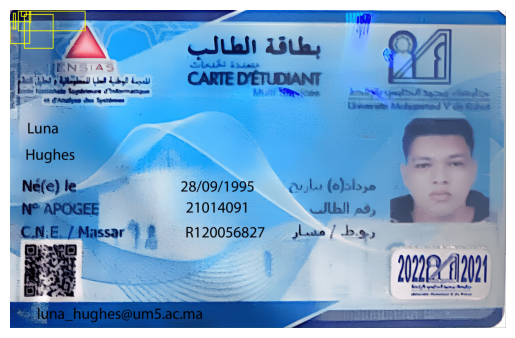

In [ ]:
def object_detection(path):
    image = load_img(path)
    image = np.array(image, dtype=np.uint8)
    image1 = load_img(path, target_size=(224, 224))
    # Normalisation de l'image
    image_arr_224 = img_to_array(image1) / 255.0
    h, w, d = image.shape
    test_arr = image_arr_224.reshape(1, 224, 224, 3)
    # Make predictions
    coords = model.predict(test_arr)
    # denormalisation des résultas
    denorm = np.array([w, w, h, h] * 6)
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # Dessiner les bounding boxes
    prenom_xmin, prenom_xmax, prenom_ymin, prenom_ymax, nom_xmin, nom_xmax, nom_ymin, nom_ymax, date_xmin, date_xmax, date_ymin, date_ymax, apogee_xmin, apogee_xmax, apogee_ymin, apogee_ymax, cne_xmin, cne_xmax, cne_ymin, cne_ymax, email_xmin, email_xmax, email_ymin, email_ymax = coords[0]
    prenom1 = (prenom_xmin, prenom_ymin)
    prenom2 = (prenom_xmax, prenom_ymax)
    nom1 = (nom_xmin, nom_ymin)
    nom2 = (nom_xmax, nom_ymax)
    date1 = (date_xmin, date_ymin)
    date2 = (date_xmax, date_ymax)
    apogee1 = (apogee_xmin, apogee_ymin)
    apogee2 = (apogee_xmax, apogee_ymax)
    cne1 = (cne_xmin, cne_ymin)
    cne2 = (cne_xmax, cne_ymax)
    email1 = (email_xmin, email_ymin)
    email2 = (email_xmax, email_ymax)
    cv2.rectangle(image, prenom1, prenom2, (255, 255, 0), 3)
    cv2.rectangle(image, nom1, nom2, (255, 255, 0), 3)
    cv2.rectangle(image, date1, date2, (255, 255, 0), 3)
    cv2.rectangle(image, apogee1, apogee2, (255, 255, 0), 3)
    cv2.rectangle(image, cne1, cne2, (255, 255, 0), 3)
    cv2.rectangle(image, email1, email2, (255, 255, 0), 3)
    return image, coords

image, cods = object_detection(path)

plt.imshow(image)
plt.axis('off')
plt.show()